In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_excel(r'./220617_exim2.xlsx')
df

C:\Users\Administrator\anaconda3\envs\ex\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,항목,시점,호주,중국,독일,인도(인디아),일본,러시아,사우디아라비아,싱가포르,대만,미국,베트남
0,수출액 (천달러),2012.1/4,2207275.0,31337495.0,1919165.0,3027408.0,10103421.0,2498689.0,1919074.0,5499739.0,3831596.0,15677356.0,3572486.0
1,NaN,2012.2/4,2331547.0,32008345.0,2125595.0,3041117.0,9247619.0,3013467.0,2436017.0,5844087.0,3727441.0,15011739.0,3893852.0
2,NaN,2012.3/4,2307104.0,34092278.0,1683059.0,3121308.0,9484665.0,2986501.0,2331178.0,5658893.0,3513860.0,13727744.0,4073095.0
3,NaN,2012.4/4,2404559.0,36884447.0,1781872.0,2732203.0,9960352.0,2598482.0,2425772.0,5885200.0,3741960.0,14107719.0,4406543.0
4,NaN,2013.1/4,2373029.0,33498337.0,2082093.0,2935485.0,9123152.0,2777600.0,2451694.0,5824216.0,3976571.0,14942302.0,4762534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,2020.4/4,5334377.0,30790345.0,5751482.0,1182033.0,12757155.0,2539039.0,4148846.0,2173956.0,5072301.0,13462347.0,4937208.0
76,NaN,2021.1/4,6737584.0,30669783.0,4943103.0,1661098.0,12898554.0,3006631.0,4386505.0,2805024.0,5521652.0,17000222.0,5835709.0
77,NaN,2021.2/4,6758150.0,33815909.0,5935557.0,1903574.0,13412320.0,4165703.0,5432945.0,2912689.0,5579816.0,19365838.0,5766860.0
78,NaN,2021.3/4,9233173.0,34664926.0,5495654.0,2214448.0,13640303.0,4323730.0,6125556.0,2431903.0,6015452.0,18509439.0,6089732.0


In [3]:
del df['항목']
del df['시점']

In [4]:
df

,호주,중국,독일,인도(인디아),일본,러시아,사우디아라비아,싱가포르,대만,미국,베트남
0,2207275.0,31337495.0,1919165.0,3027408.0,10103421.0,2498689.0,1919074.0,5499739.0,3831596.0,15677356.0,3572486.0
1,2331547.0,32008345.0,2125595.0,3041117.0,9247619.0,3013467.0,2436017.0,5844087.0,3727441.0,15011739.0,3893852.0
2,2307104.0,34092278.0,1683059.0,3121308.0,9484665.0,2986501.0,2331178.0,5658893.0,3513860.0,13727744.0,4073095.0
3,2404559.0,36884447.0,1781872.0,2732203.0,9960352.0,2598482.0,2425772.0,5885200.0,3741960.0,14107719.0,4406543.0
4,2373029.0,33498337.0,2082093.0,2935485.0,9123152.0,2777600.0,2451694.0,5824216.0,3976571.0,14942302.0,4762534.0
...,...,...,...,...,...,...,...,...,...,...,...
75,5334377.0,30790345.0,5751482.0,1182033.0,12757155.0,2539039.0,4148846.0,2173956.0,5072301.0,13462347.0,4937208.0
76,6737584.0,30669783.0,4943103.0,1661098.0,12898554.0,3006631.0,4386505.0,2805024.0,5521652.0,17000222.0,5835709.0
77,6758150.0,33815909.0,5935557.0,1903574.0,13412320.0,4165703.0,5432945.0,2912689.0,5579816.0,19365838.0,5766860.0
78,9233173.0,34664926.0,5495654.0,2214448.0,13640303.0,4323730.0,6125556.0,2431903.0,6015452.0,18509439.0,6089732.0


In [5]:
date = pd.date_range(start="2012-1", end='2022-1', freq='Q-DEC')
date = date.to_list()
date.extend(date)

df['new_date'] = pd.to_datetime(date)
df['date'] = pd.to_datetime(date)
df2 = df.set_index('new_date')
df2

,호주,중국,독일,인도(인디아),일본,러시아,사우디아라비아,싱가포르,대만,미국,베트남,date
new_date,,,,,,,,,,,,
2012-03-31,2207275.0,31337495.0,1919165.0,3027408.0,10103421.0,2498689.0,1919074.0,5499739.0,3831596.0,15677356.0,3572486.0,2012-03-31
2012-06-30,2331547.0,32008345.0,2125595.0,3041117.0,9247619.0,3013467.0,2436017.0,5844087.0,3727441.0,15011739.0,3893852.0,2012-06-30
2012-09-30,2307104.0,34092278.0,1683059.0,3121308.0,9484665.0,2986501.0,2331178.0,5658893.0,3513860.0,13727744.0,4073095.0,2012-09-30
2012-12-31,2404559.0,36884447.0,1781872.0,2732203.0,9960352.0,2598482.0,2425772.0,5885200.0,3741960.0,14107719.0,4406543.0,2012-12-31
2013-03-31,2373029.0,33498337.0,2082093.0,2935485.0,9123152.0,2777600.0,2451694.0,5824216.0,3976571.0,14942302.0,4762534.0,2013-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,5334377.0,30790345.0,5751482.0,1182033.0,12757155.0,2539039.0,4148846.0,2173956.0,5072301.0,13462347.0,4937208.0,2020-12-31
2021-03-31,6737584.0,30669783.0,4943103.0,1661098.0,12898554.0,3006631.0,4386505.0,2805024.0,5521652.0,17000222.0,5835709.0,2021-03-31
2021-06-30,6758150.0,33815909.0,5935557.0,1903574.0,13412320.0,4165703.0,5432945.0,2912689.0,5579816.0,19365838.0,5766860.0,2021-06-30


In [6]:
cols = df2.columns[:-1]

df2_ex = df2.iloc[0:40, :]
df2_im = df2.iloc[40:]

for i in cols : 
    df2_ex[f"diff_{i}"] = (np.log(df2_ex[i]) - np.log(df2_ex[i]).shift(1))*100
    df2_im[f"diff_{i}"] = (np.log(df2_im[i]) - np.log(df2_im[i]).shift(1))*100

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1392\3082491913.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_ex[f"diff_{i}"] = (np.log(df2_ex[i]) - np.log(df2_ex[i]).shift(1))*100
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1392\3082491913.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_im[f"diff_{i}"] = (np.log(df2_im[i]) - np.log(df2_im[i]).shift(1))*100
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1392\3082491913.py:7: SettingWithCopyWarning: 
A value is trying to be

In [7]:
df3_ex = df2_ex.iloc[:,11:].fillna(0)
df3_ex.head(3)

,date,diff_호주,diff_중국,diff_독일,diff_인도(인디아),diff_일본,diff_러시아,diff_사우디아라비아,diff_싱가포르,diff_대만,diff_미국,diff_베트남
new_date,,,,,,,,,,,,
2012-03-31,2012-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-06-30,2012-06-30,5.477327,2.118135,10.216157,0.451807,-8.850797,18.732505,23.852155,6.072974,-2.755949,-4.338488,8.613719
2012-09-30,2012-09-30,-1.053894,6.307426,-23.343879,2.602726,2.531017,-0.898878,-4.399061,-3.220209,-5.900679,-8.941360,4.500425


In [8]:
df3_im = df2_im.iloc[:,11:].fillna(0)
df3_im.head(3)

,date,diff_호주,diff_중국,diff_독일,diff_인도(인디아),diff_일본,diff_러시아,diff_사우디아라비아,diff_싱가포르,diff_대만,diff_미국,diff_베트남
new_date,,,,,,,,,,,,
2012-03-31,2012-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-06-30,2012-06-30,-17.660233,2.087411,2.232202,8.896379,-5.831406,-7.498344,-4.027513,-1.761505,0.293123,-2.362077,6.920554
2012-09-30,2012-09-30,19.817161,-2.952497,2.488428,-15.641440,-1.184117,12.907770,-9.484788,2.875642,-5.434978,-13.213691,19.904590


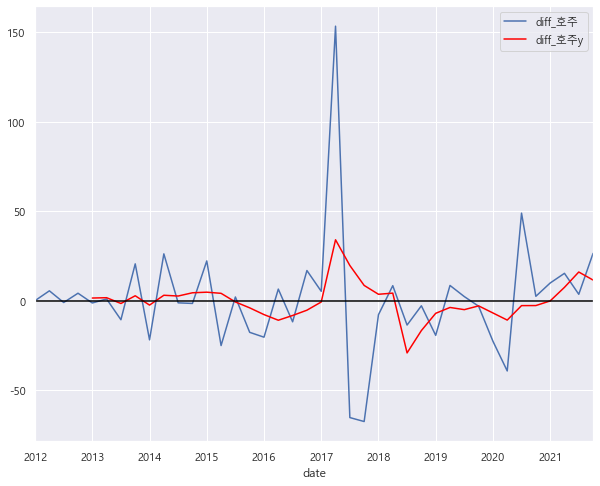

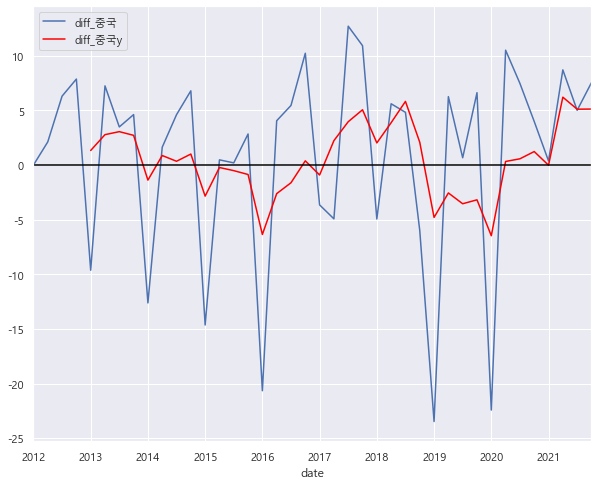

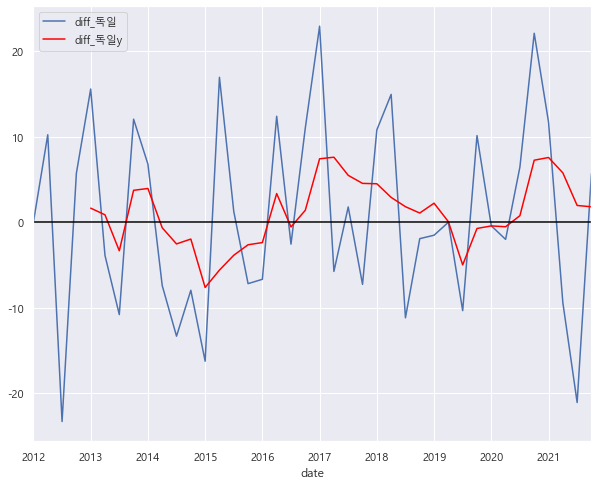

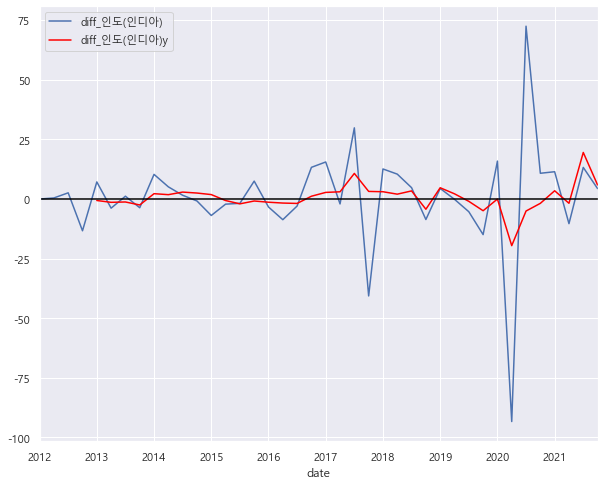

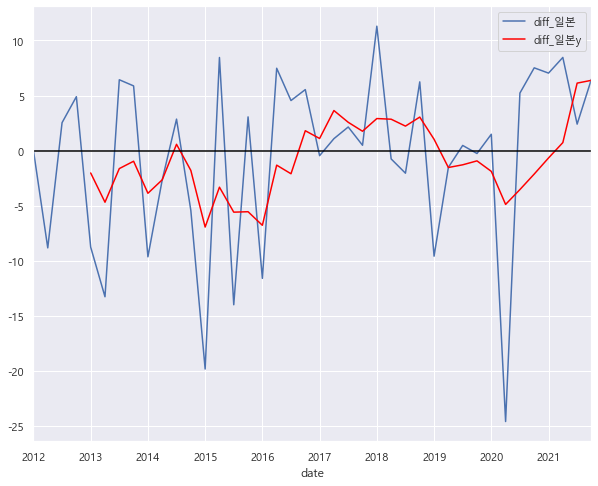

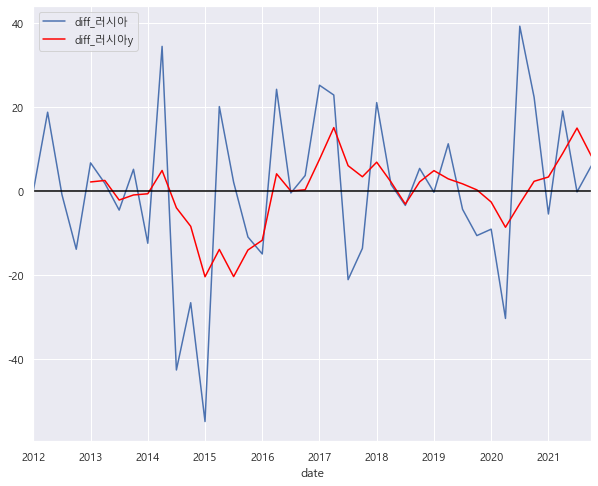

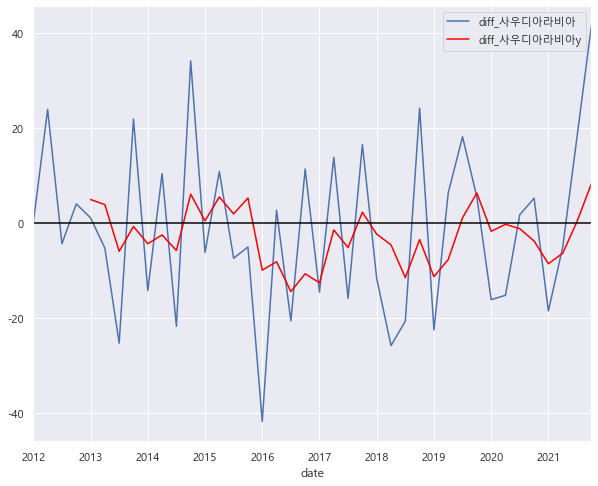

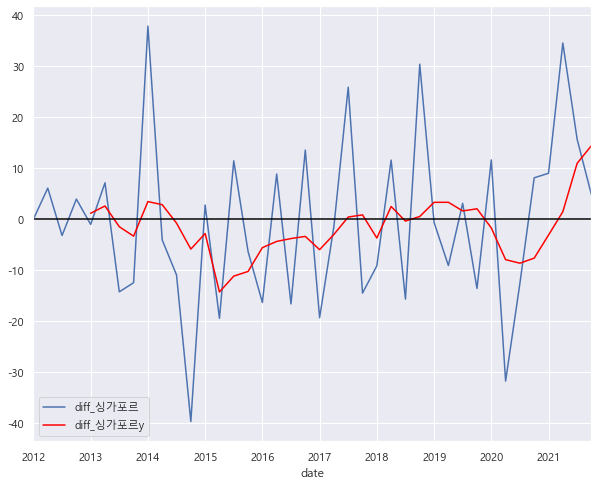

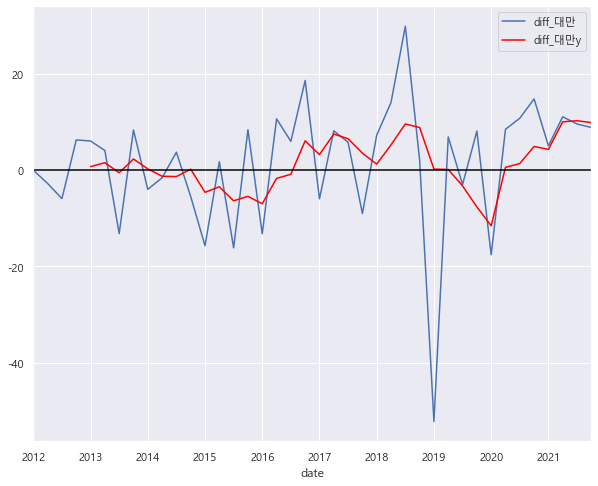

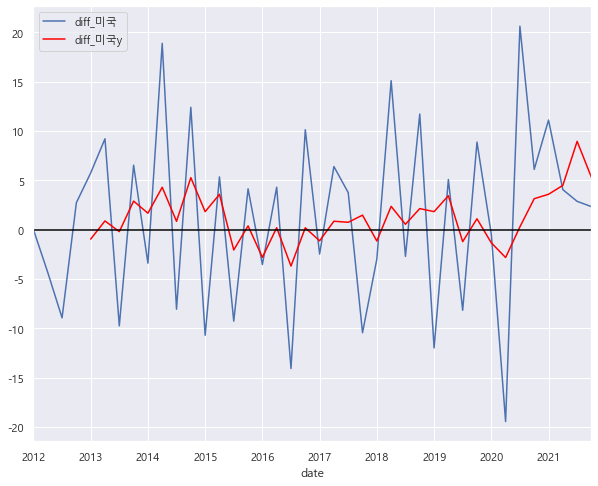

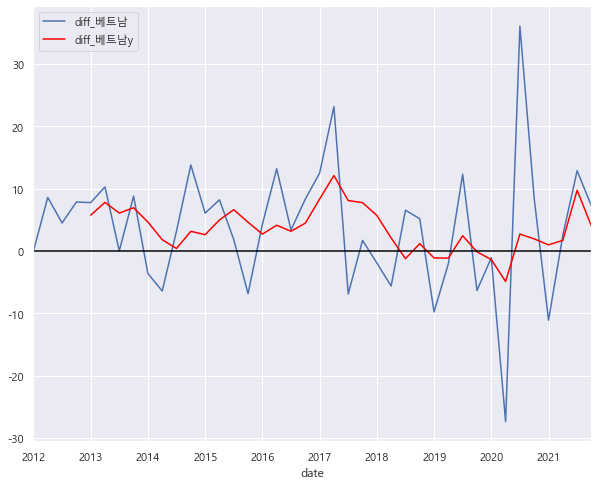

In [9]:
sns.set(style='darkgrid')
plt.rcParams['font.family'] = 'Malgun Gothic'

for i in df3_ex.columns[1:] :
    df3_ex[f'{i}y'] = df3_ex[i].rolling(window=5).mean()
    ax = df3_ex.plot(x='date', y=i, figsize=(10,8))
    df3_ex.plot(x='date', y=f'{i}y', color='red', ax=ax, figsize=(10,8))
    plt.axhline(y = 0, color='black', linestyle = '-')
    plt.show()

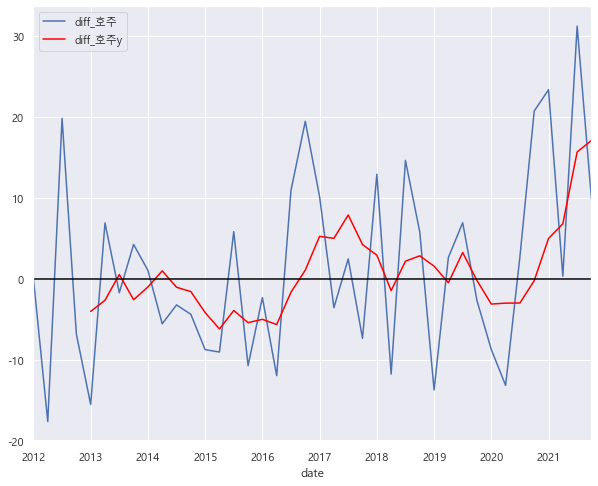

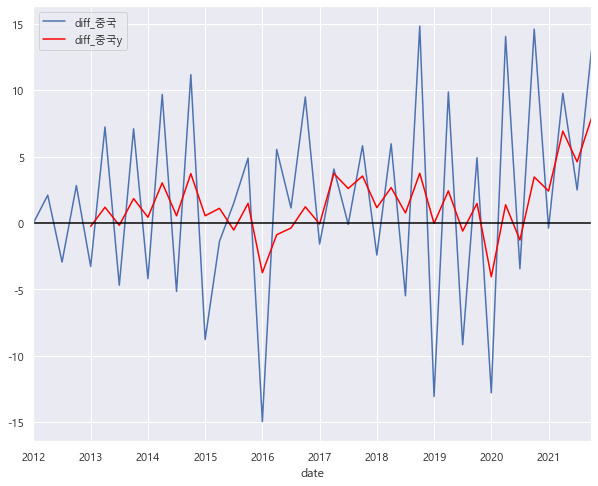

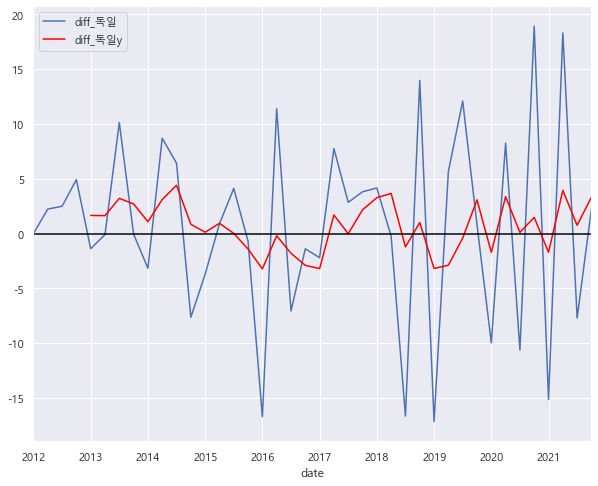

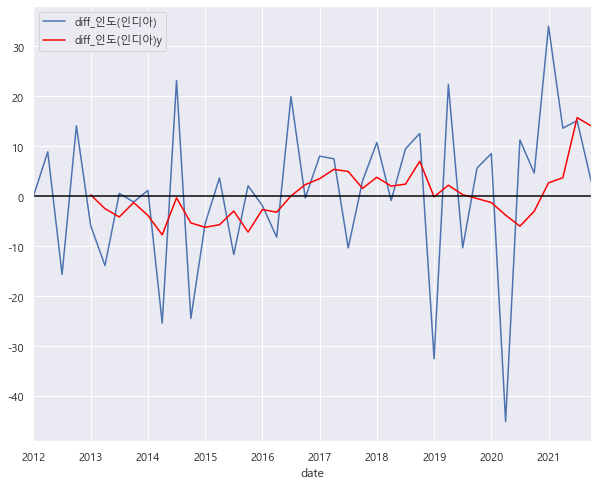

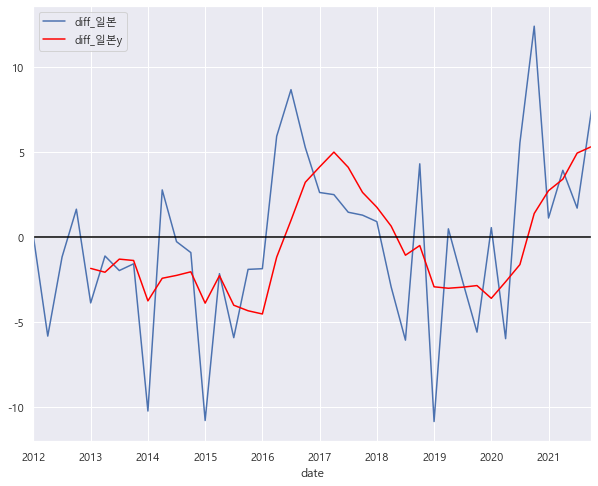

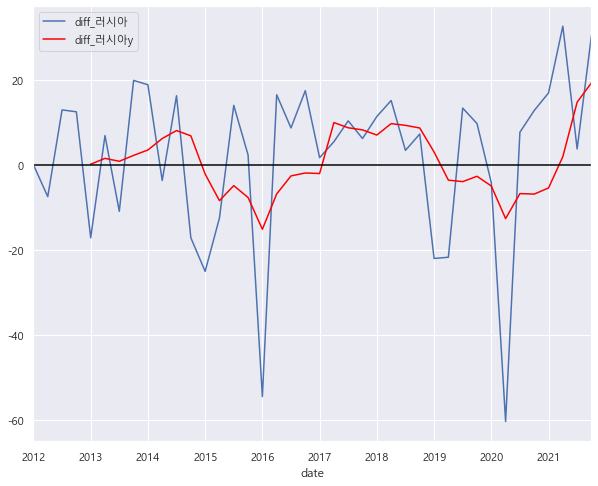

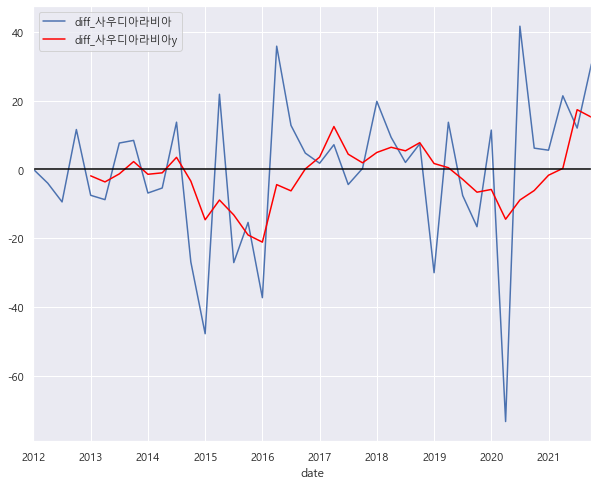

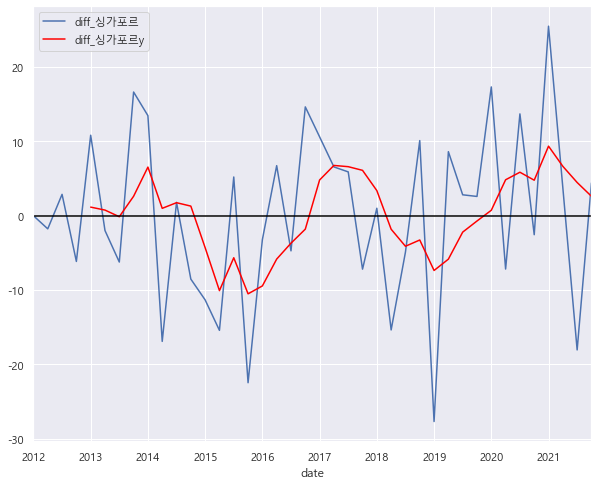

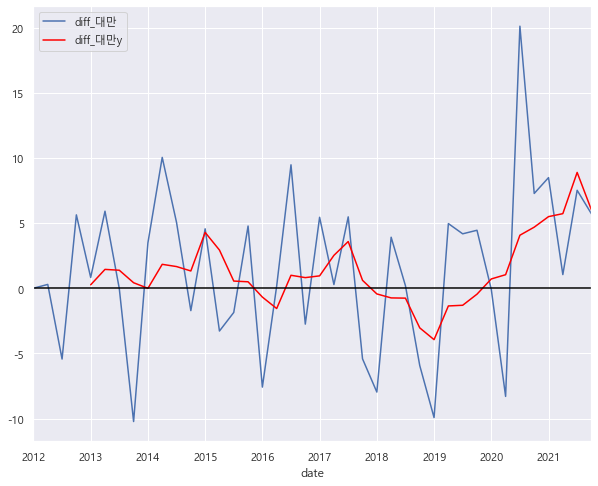

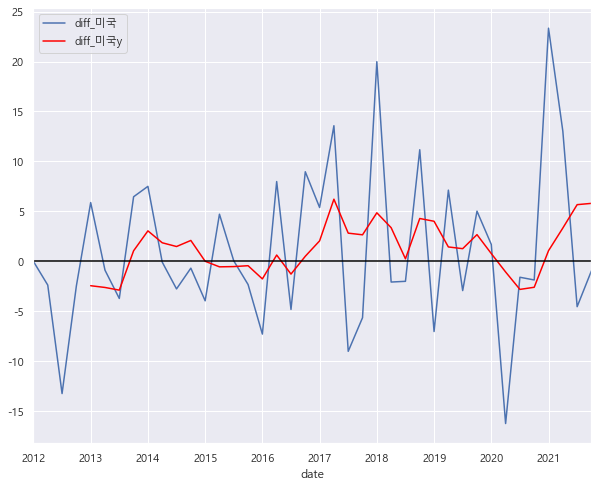

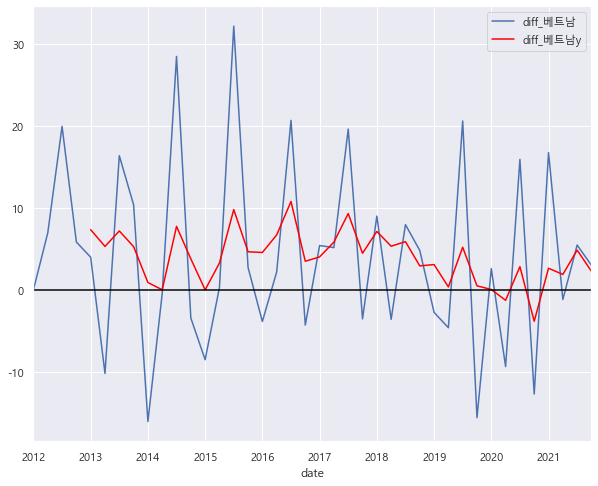

In [10]:
sns.set(style='darkgrid')
plt.rcParams['font.family'] = 'Malgun Gothic'

for i in df3_im.columns[1:] :
    df3_im[f'{i}y'] = df3_im[i].rolling(window=5).mean()
    ax = df3_im.plot(x='date', y=i, figsize=(10,8))
    df3_im.plot(x='date', y=f'{i}y', color='red', ax=ax, figsize=(10,8))
    plt.axhline(y = 0, color='black', linestyle = '-')
    plt.show()